Check 3d cloud ml2pl interpolation for MIROC5

In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

# mathematical and physical constants
rad2deg = 180.0/np.pi
deg2rad = np.pi/180

In [ ]:
path  = '/work/bm0162/b380459/TRACMIP/MIROC5/AquaControl/Aday/'

ds_cl_eta  = ( xr.open_dataset(path+'cl_Aday_MIROC5_AquaControl_r1i1p1_10360101-10451230.nc', decode_times=False).
              isel(time=[0])['cl'] )

In [11]:
ds_ps = ( xr.open_dataset(path+'ps_Aday_MIROC5_AquaControl_r1i1p1_10360101-10451230.nc', decode_times=False).
         isel(time=[0])['cl'] )['ps']

ds_vct= xr.open_dataset('/pf/b/b380459/TRACMIP_Cmorizing/cdocmor_input/MIROC5/miroc5_tracmip_hybrid_coef.nc')

In [4]:
ds_cl_plev = ( xr.open_dataset(path+'cl_Aday_MIROC5_AquaControl_r1i1p1_10360101-10451230.nc_plevels', decode_times=False).
              isel(time=[0])['cl'] )['cl']

In [3]:
ds_cl_eta

<xarray.DataArray 'cl' (time: 360, HETA40: 40, lat: 128, lon: 256)>
[471859200 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 5.625 7.031 8.438 9.844 ...
  * lat      (lat) float64 88.93 87.54 86.14 84.74 83.34 81.94 80.54 79.14 ...
  * HETA40   (HETA40) float64 0.9975 0.9915 0.983 0.972 0.9585 0.942 0.9225 ...
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
Attributes:
    units:         1
    grid_type:     gaussian
    orignal_name:  CLDFRC

In [5]:
ds_cl_plev

<xarray.DataArray 'cl' (time: 360, lev: 17, lat: 128, lon: 256)>
[200540160 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 5.625 7.031 8.438 9.844 ...
  * lat      (lat) float64 88.93 87.54 86.14 84.74 83.34 81.94 80.54 79.14 ...
  * lev      (lev) float64 1e+03 2e+03 3e+03 5e+03 7e+03 1e+04 1.5e+04 2e+04 ...
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
Attributes:
    units:         1
    grid_type:     gaussian
    orignal_name:  CLDFRC

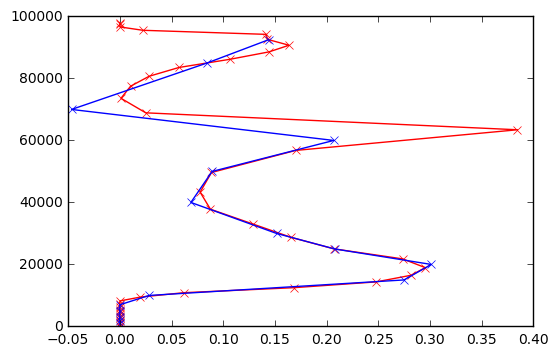

In [30]:
itim=3
ilat=67
ilon=54

plt.plot(ds_cl_eta[itim ,::-1,ilat,ilon], 100*ds_ps[itim,ilat,ilon].values*ds_vct['hybm'].values+ds_vct['hyam'].values, 'rx-')
plt.plot(ds_cl_plev[itim,:   ,ilat,ilon], ds_cl_plev.lev, 'bx-')
plt.show()

In [12]:
ds_vct

<xarray.Dataset>
Dimensions:  (ncl0: 40, ncl1: 40)
Dimensions without coordinates: ncl0, ncl1
Data variables:
    hyam     (ncl0) float32 290.47 1060.3 1861.3 2659.3 3361.3 4015.8 4693.7 ...
    hybm     (ncl1) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [15]:
ds_vct['hybm'].values

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0274995 ,  0.10264   ,  0.18492   ,  0.27908   ,  0.3847    ,
        0.48374999,  0.56483001,  0.63428003,  0.69215   ,  0.73987001,
        0.78178   ,  0.82080001,  0.85620999,  0.88800001,  0.91618001,
        0.94002998,  0.95954001,  0.97543001,  0.98772001,  0.99638999], dtype=float32)